In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('./Customer-Churn-Records.csv')

df_input = df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Exited']]


In [4]:
X = df_input.drop(columns=['Exited'])
y = df_input['Exited']

In [5]:
minmax = MinMaxScaler()

X_scaled = X.copy()
X_scaled = minmax.fit_transform(X_scaled)
y_vals = y.values

X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y_vals, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
callback = EarlyStopping(monitor='val_loss',
                         patience=5,
                         mode='min')

In [8]:
history = model.fit(x=X_train, y=y_train,
          batch_size=128,
          epochs=30,
          validation_data=(X_val, y_val),
          callbacks=callback)

Epoch 1/30
44/44 [==============================] - 2s 13ms/step - loss: 0.4481 - accuracy: 0.8219 - val_loss: 0.3345 - val_accuracy: 0.8368
Epoch 2/30
44/44 [==============================] - 0s 7ms/step - loss: 0.2475 - accuracy: 0.9115 - val_loss: 0.1648 - val_accuracy: 0.9573
Epoch 3/30
44/44 [==============================] - 0s 8ms/step - loss: 0.1085 - accuracy: 0.9852 - val_loss: 0.0569 - val_accuracy: 0.9989
Epoch 4/30
44/44 [==============================] - 0s 8ms/step - loss: 0.0350 - accuracy: 0.9984 - val_loss: 0.0147 - val_accuracy: 0.9995
Epoch 5/30
44/44 [==============================] - 0s 8ms/step - loss: 0.0145 - accuracy: 0.9984 - val_loss: 0.0068 - val_accuracy: 0.9995
Epoch 6/30
44/44 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.9984 - val_loss: 0.0050 - val_accuracy: 0.9995
Epoch 7/30
44/44 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.9984 - val_loss: 0.0044 - val_accuracy: 0.9995
Epoch 8/30
44/44 [=

In [9]:
def history_plot(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epoch = range(1, epochs+1)

    plt.figure()
    plt.plot(epoch, acc, 'bo' ,label='Training Accuracy')
    plt.plot(epoch, val_acc, 'b', label='Validation Accuracy')
    plt.title("Training and Valiation Accuracy")
    plt.legend()

    plt.figure()
    plt.plot(epoch, loss, 'bo' ,label='Training Loss')
    plt.plot(epoch, val_loss, 'b', label='Validation Loss')
    plt.title("Training and Valiation Loss")
    plt.legend()

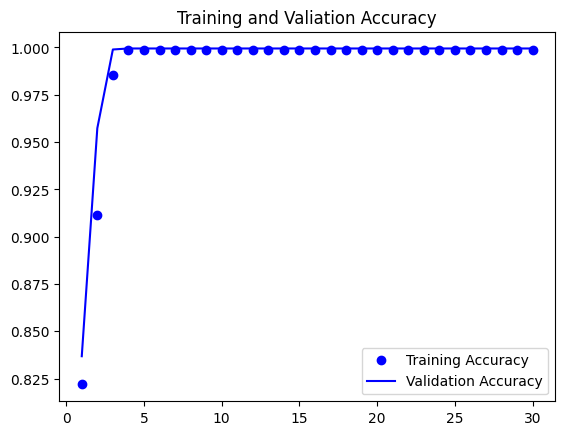

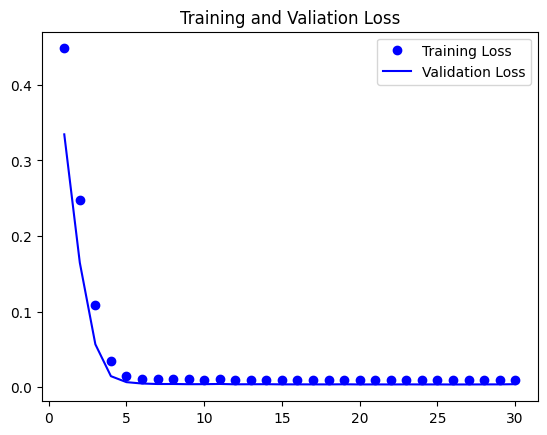

In [10]:
history_plot(history, 30)

In [11]:
evaluation = model.evaluate(x=X_test, y=y_test)

print(f"Test loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

79/79 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9984
Test loss: 0.013336820527911186
Test Accuracy: 0.9983999729156494
